In [1]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SparkSession
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.regression import LinearRegressionWithSGD as lrSGD

spark = SparkSession \
    .builder \
    .appName("Python Spark regression example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [98]:
titanicDataFrame = spark.read.csv('titanic/titanic.csv',header=True)

AnalysisException: 'Path does not exist: file:/Users/natepill/dev/courses/DS_23/pandas_pyspark/titanic/titanic.csv;'

### Drop na rows based on occurance in Age column

In [66]:
titanicDataFrame.na.drop(how="any", subset=["Age"])

DataFrame[PassengerId: string, Survived: string, Pclass: string, Name: string, Sex: string, Age: string, SibSp: string, Parch: string, Ticket: string, Fare: string, Cabin: string, Embarked: string]

### Was going to try to One Hot Encode the "Sex" column and then set those values to a new "Gender" column, however withcolumn method seems to be easier to implement

In [63]:
# from pyspark.sql.functions import col, split
# df = titanicDataFrame["Sex"]
# df = titanicDataFrame.withColumn(col=titanicDataFrame["Sex"], colName="Gender")
# df.show()

# from pyspark.ml.feature import CountVectorizer
# Vectorizer = CountVectorizer(inputCol="Sex", outputCol="Gender", vocabSize=2)

# Vectorizer_model = Vectorizer.fit(titanicDataFrame)

In [71]:
titanicDataFrame = titanicDataFrame.withColumn("Gender", when(titanicDataFrame['Sex'] == "female", 0).otherwise(1))

### Shape of Dataframe

In [73]:
titanicDataFrame.count(), len(titanicDataFrame.columns)

(891, 13)

In [97]:
import seaborn as sns
import pandas as pd


import matplotlib.pyplot as plt

genders = titanicDataFrame.select('Embarked').rdd.flatMap(lambda x: x).histogram(11)


TypeError: Can not generate buckets with non-number in RDD

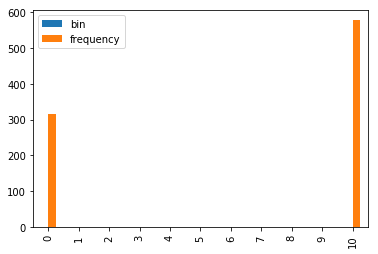

In [96]:
# Show emba

df.filter(df['Embarked'] == "C").show()